# Eda

Me enfocaré en la realización del eda, luego agregamos la introducción, razón del mismo etc. Procuraré documentar cada paso que haga dentro de este

### Librerías a usar:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## USA

### Creación del dataframe a analizar:

In [ ]:
df = pd.read_csv('src/data/usa_df.csv')

### Comienzo del analisis:

Se comenzará el analisis del dataframe de USA, observando los metadatos del mismo, para proseguir con una analisis más especifico sobre sus columnas.

In [ ]:
df.shape

(429325, 22)

El dataframe contiene 22 columnas y 429325 filas.

In [ ]:
df.columns


Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

El nombre de las columnas son:

- time
- latitude
- longitude
- depth
- mag
- magType
- ns    
- gap
- dmin
- rms
- net
- id
- updated
- place
- typ
- horizontalError
- depthError
- magError
- magNst
- status
- locationSource
- magSource

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429325 entries, 0 to 429324
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             429325 non-null  object 
 1   latitude         429325 non-null  float64
 2   longitude        429325 non-null  float64
 3   depth            429325 non-null  float64
 4   mag              429325 non-null  float64
 5   magType          429324 non-null  object 
 6   nst              423185 non-null  float64
 7   gap              429289 non-null  float64
 8   dmin             425008 non-null  float64
 9   rms              429232 non-null  float64
 10  net              429325 non-null  object 
 11  id               429325 non-null  object 
 12  updated          429325 non-null  object 
 13  place            428485 non-null  object 
 14  type             429325 non-null  object 
 15  horizontalError  349461 non-null  float64
 16  depthError       429233 non-null  floa

Las columnas del dataframe tienen distintos tipos de datos, por lo que se pueden categorizar las columnas por el tipo de datos que contengan.

Columnas tipo object( columnas que muy probablemente tengan datos del tipo string o de texto ):

- time
- magType
- net
- id
- updated
- place
- type
- status
- locationSource
- magSource

Columnas tipo float( columnas con datos numericos decimales ):

- latitude
- longitude
- depth
- mag
- nst
- gap
- dmin
- rms
- horizontalError
- depthError
- magError
- magNst

Se analizará primero las columnas con datos de tipo string(texto), para continuar posteriormente con las de tipo numerico.

### Columnas de tipo string

Antes de empezar el analisis de cada columna, es necesario entender a qué hace referencia cada columna, y nombrarlas con nombres más faciles de entender. Observemos de forma general el contenido del dataframe en busca de darle un mejor nombre a las columnas por su contenido.

In [ ]:
df.select_dtypes(include=['object']).head()

,time,magType,net,id,updated,place,type,status,locationSource,magSource
0,2023-06-29T04:46:02.350Z,md,nc,nc73906566,2023-06-29T05:02:15.178Z,"3km NW of The Geysers, CA",earthquake,automatic,nc,nc
1,2023-06-29T04:45:40.370Z,ml,ci,ci40498704,2023-06-29T04:49:10.599Z,"9km S of Idyllwild, CA",earthquake,automatic,ci,ci
2,2023-06-29T04:23:14.270Z,md,nc,nc73906556,2023-06-29T04:39:17.028Z,"7km NW of The Geysers, CA",earthquake,automatic,nc,nc
3,2023-06-29T03:57:40.330Z,ml,ci,ci40498656,2023-06-29T04:08:55.110Z,"2km ESE of Redlands, CA",earthquake,automatic,ci,ci
4,2023-06-29T03:26:25.154Z,ml,ok,ok2023mphw,2023-06-29T03:29:05.456Z,"10 km WNW of Kingfisher, Oklahoma",earthquake,automatic,ok,ok


- La columna time, hace referencia a la fecha con su respectiva hora en la que se tomó la medida del evento, se cambiará su nombre a "fecha". Como esta columna contiene fechas, se cambiara su tipo de dato de "object" a "date_time" para mejorar el analisis

- La columna magType, hace referencia al tipo de magnitud registrada, la clasificación de las mismas se puede encontrar en este --> [link](https://www.usgs.gov/programs/earthquake-hazards/magnitude-types) <--, se cambiará su nombre a "tipo_magnitud"
- La columna net, hace referencia a la "Network" o red sismologica que detecto el evento, si se desea saber más sobre a qué hace referencia cada codigo revisar esta --> [página](http://www.fdsn.org/networks/?search=nc) <--, se cambiará su nombre a "red_sismologica"
- La columna id, hace referencia a la identificación del evento sucedido, se cambiará su nombre a "identificacion"
- La columna updated, hace referencia a la fecha y a su respectiva hora en la que se modificó la medida del evento, se cambiará su nombre a "fecha_modificacion". Al igual que la columna fecha, el tipo de dato de esta columna debe cambiarse para ser tomada como una fecha y no un texto
- La columna place, hace referencia al lugar donde sucedió el evento, se cambiará su nombre a "lugar_evento"
- La columna type, hace referencia al tipo de evento que se documentó, en este caso tan particular, todos los eventos son del tipo "earthquake", por lo que se puede borrar esta columna sin afectar la integridad del dataframe, primero confirmemos esto antes de eliminarla, se cambiará su nombre a "tipo_evento"
- La columna status, hace referencia al estado o estado de procesamiento de un evento sísmico. Proporciona información sobre la etapa en la que se encuentra el evento sísmico en el proceso de recopilación, análisis y reporte de datos, recibirá el nombre de "estado_evento"
- La columna  locationSource, hace referencia a la fuente o el método utilizado para determinar la ubicación de un evento sísmico registrado. Sus valores son similares a los de la columna red_sismologica. Se cambiará su nombre a "fuente_localizacion"
- La columna magSource, hace referencia a la fuente o la agencia responsable de calcular la magnitud de un evento sísmico. Sus valores son similares a los de la columna red_sismologica y fuente_localizacion. Se cambiará su nombre a "fuente_magnitud"


( anotacion, esto se puede borrar, son planes a futuro) Voy a detenerme acá, luego continuo, la idea es cambiar los nombres, el tipo de datos de las fechas, luego revisar si hay datos nulos, la frecuencia de los datos, la relacion entre los datos de red simologica, fuente localizacion, fuente magnitud por que en caso de tener la mismo info, se puede puede borrar alguna de ellas y dejar solo una

In [ ]:
# cambio de nombre de las columnas
nuevos_nombres = {'time' : 'fecha',
'magType': 'tipo_magnitud',
'net': 'red_sismologica',
'id': 'identificacion',
'updated': 'fecha_modificacion',
'place':'lugar_evento',
'type':'tipo_evento',
'status':'estado_evento',
'locationSource':'fuente_localizacion',
'magSource':'fuente_magnitud'}
df.rename(columns = nuevos_nombres, inplace=True)

# cambio de tipo de dato de las columnas fecha y fecha_modificacion
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha_modificacion'] = pd.to_datetime(df['fecha_modificacion'])



##### Columna fecha

Teniendo las fechas, podemos comenzar el análisis revisando desde cuando están disponibles los datos:

In [ ]:
df.fecha.head(1)

0   2023-06-29 04:46:02.350000+00:00
Name: fecha, dtype: datetime64[ns, UTC]

In [ ]:
df.fecha.tail(1)

429324   2018-01-01 00:01:50.770000+00:00
Name: fecha, dtype: datetime64[ns, UTC]

Tenemos un rango de datos desde el 29 de junio del 2023, hasta el 1 de enero de 2018. 5 años de datos para analizar. Observemos de los datos disponible, que año tiene la mayor cantidad de terremotos:

Text(0.5, 1.0, 'Cantidad de Registros por Año')

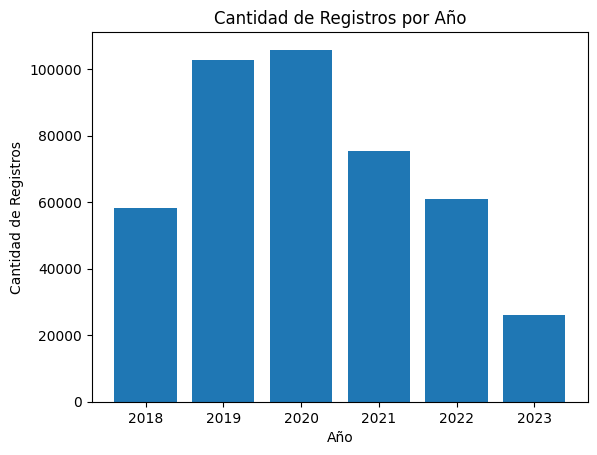

In [ ]:
conteo = df['fecha'].dt.year.value_counts()
plt.bar(conteo.index, conteo.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Año')

Se puede observar que el año con mayor eventos registrados es el 2020, seguido por el 2019, con esto presente, se puede optar por tomar estos años como referente para la creación del modelo de clasificación de terremotos. Miremos la cantidad de terremotos por meses

Text(0.5, 1.0, 'Cantidad de Registros por Mes')

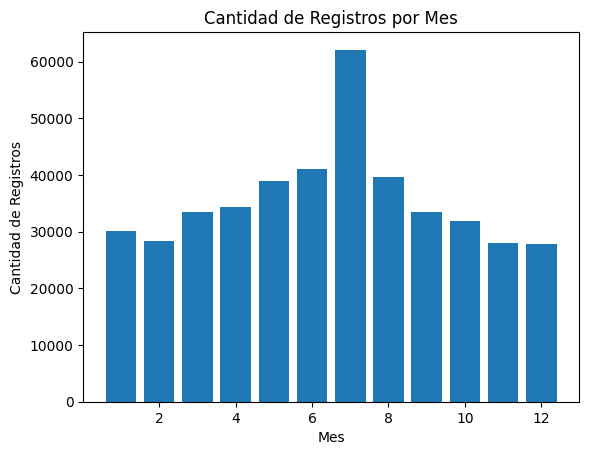

In [ ]:
conteo = df['fecha'].dt.month.value_counts()
plt.bar(conteo.index, conteo.values)
"""nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks(conteo.index, nombres_meses)"""
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Mes')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=db6802ae-5366-42d7-989b-ff60aa4b4014' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>